## <center><font color=navy>Big Data Economics</font></center>
### <center>Least Absolute Shrinkage and Selection Operator - LASSO</center>
#### <center>Ali Habibnia</center>
    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 

<div class="alert alert-block alert-info">

> Lasso is one alternative method to stepwise regression and other model selection and dimensionality reduction techniques.

<img src="images/penalize.png"  width="500">


</div>




### Readings:

1. ***Chapter 5.2  - 6.5,*** Graham Elliott, and Allan Timmermann, Economic Forecasting, Princeton University Press, 2016.
2. ***Chapter 3.4,*** [The Elements of Statistical Learning: Data Mining, Inference, and Prediction](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf). 

### Goals

- Polynomial Regression

- Overfitting and Underfitting

- Least Absolute Shrinkage and Selection Operator - LASSO


### Polynomial regression models

#### Polynomial models in one variable

Polynomial regression is another form of regression in which the maximum power of the independent variable is more than 1. In this regression technique, the best fit line is not a straight line instead it is in the form of a curve.
A $kth$ order polynomial in one variable is defined as 

<br>
<center>  $  y = \beta_0 + \beta_1 x + \beta_2 x^2 + · · · + \beta_k x^k + \varepsilon $   </center>
<br>

Polynomial models are useful

- useful when transformations cannot linearize the relation between the predictors and the response.
- in situations where the analyst knows that curvilinear effects are present in the true response function.
- as approximating functions to unknown and possibly very complex nonlinear relationships.

> We can think of the polynomial model as the [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) expansion of the unknown function.


#### Why Polynomial Regression?

To understand the need for polynomial regression, let’s generate some random dataset first.

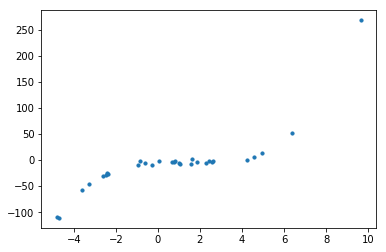

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# makes the random numbers predictable
x = 2 - 3 * np.random.normal(0, 1, 30)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 30)
plt.scatter(x,y, s=10)
plt.show()

Let’s apply a linear regression model to this dataset.

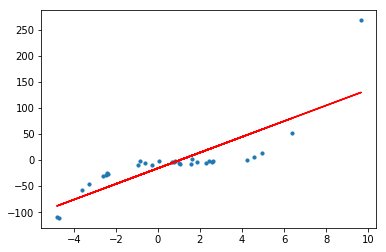

In [2]:
from sklearn.linear_model import LinearRegression

# transforming the data to include another axis
# convert a 1D array to either a row vector or a column vector
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

We can see that the straight line is unable to capture the patterns in the data. This is an example of **underfitting**. Computing the RMSE and R²-score  of the linear line gives:

In [3]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)

print (model.intercept_, model.coef_, rmse, r2 )

[-15.79313232] [[15.0458489]] 34.41800097095738 0.6680958125801718


To overcome underfitting, we need to increase the complexity of the model.
To generate a higher order equation we can add powers of the original features as new features.

<br>
<center>  $  y = \beta_0 + \beta_1 x + \beta_2 x^2 $   </center>
<br>


This is still considered to be linear model as the coefficients associated with the features are still linear. $x^2$ is only a feature. However the curve that we are fitting is quadratic in nature.

To convert the original features into their higher order terms we will use the ***PolynomialFeatures*** class provided by scikit-learn. Next, we train the model using Linear Regression.

29.386153975972263
0.7580492646555343


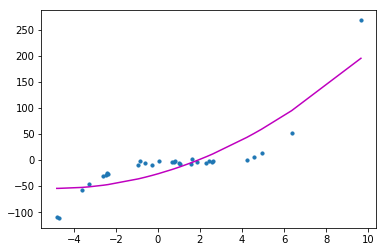

In [73]:
import operator
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

It is quite clear from the plot that the quadratic curve is able to fit the data better than the linear line. We can see that RMSE has decreased and R²-score has increased as compared to the linear line.

If we try to fit a cubic curve (degree=3) to the dataset, we can see that it passes through more data points than the quadratic and the linear plots.

2.519203275381289
0.9982218521408835


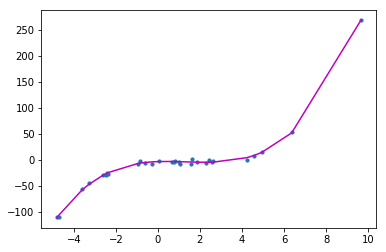

In [76]:
import operator
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

If we further increase the degree to 20, we can see that the curve passes through more data points. Below is a comparison of curves for degree 3 and 20.

5.522684953367435
0.9914544113254514


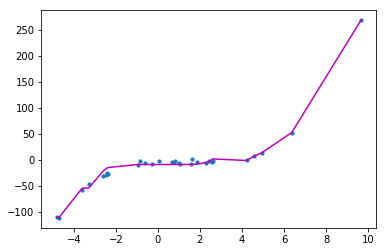

In [79]:
import operator
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

For degree=20, the model is also capturing the noise in the data. This is an example of **overfitting**. Even though this model passes through most of the data, it will fail to generalize on unseen data.

To prevent overfitting, we can add more training samples so that the algorithm doesn’t learn the noise in the system and can become more generalized. ( Note: adding more data can be an issue if the data is itself noise).

> Bias refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in underfitting.

> Variance refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in overfitting the data.

<img src="images/underover.png"  width="700">

### Polynomial Regression on Boston Housing Dataset

The objective is to predict the value of prices of the house using the given features.

Here is some description of our data:

    * CRIM - per capita crime rate by town
    * ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    * INDUS - proportion of non-retail business acres per town.
    * CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    * NOX - nitric oxides concentration (parts per 10 million)
    * RM - average number of rooms per dwelling
    * AGE - proportion of owner-occupied units built prior to 1940
    * DIS - weighted distances to five Boston employment centres
    * RAD - index of accessibility to radial highways
    * TAX - full-value property-tax rate per 10,000 dollars
    * PTRATIO - pupil-teacher ratio by town
    * B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    * LSTAT - percent lower status of the population
    * PRICE(TARGET) - Median value of owner-occupied homes in $1000's




In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# dataset
from sklearn.datasets import load_boston
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Lasso
from sklearn.linear_model import LinearRegression, Lasso
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
# load dataset
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Correlation matrix

In [6]:
# compute the pair wise correlation for all columns  
correlation_matrix = df.corr().round(2)

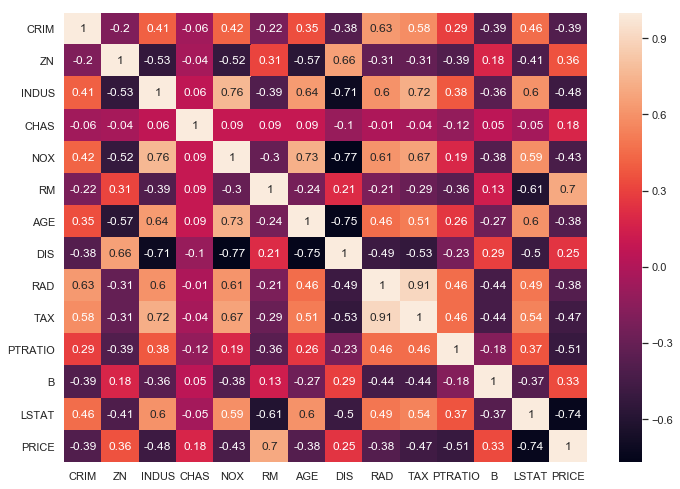

In [87]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
import seaborn as sns 
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

#### Observations

- From the above coorelation plot we can see that PRICE is strongly correlated to LSTAT, RM
- RAD and TAX are stronly correlated, so we don't include this in our features together to avoid multi-colinearity

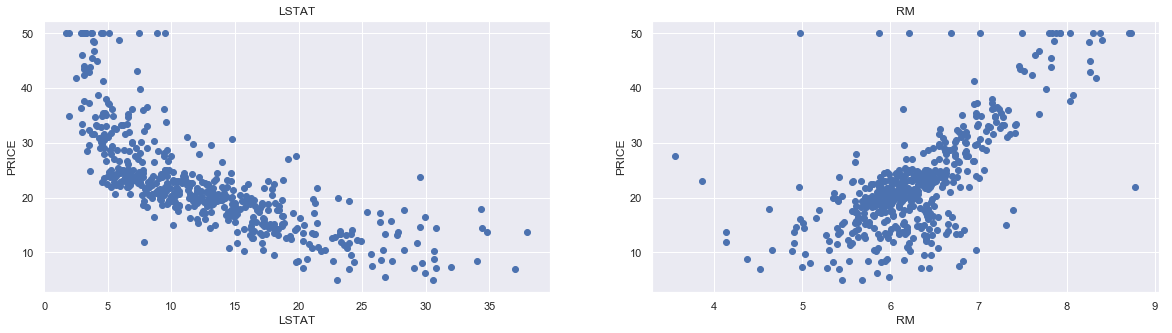

In [90]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

#### Prepare the data for model estimation

In [91]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['PRICE']

#### Split the data into training and testing sets

In [94]:
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [98]:
### Linear Regression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702912
R2 score is 0.6628996975186952


We can see that LSTAT doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with degree 2 and test.

In [99]:
### Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  poly_features = PolynomialFeatures(degree=degree)
  
  # transform the features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [96]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.703071027847756
R2 score of training set is 0.7425094297364765


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.7848198845450294
R2 score of test set is 0.8170372495892189


> **We can observe that the error has reduced after using polynomial regression as compared to linear regression**

### Least Absolute Shrinkage and Selection Operator (LASSO, L1 Regularization)

- Tibshirani (Journal of the Royal Statistical Society 1996) introduced the LASSO
- In opposite to Ridge Regression it only penalizes high coefficients. 
- Lasso has the effect of forcing some coefficient estimates to be exactly zero when $\lambda$ is sufficiently large - sparse solutions. 
- Lasso performs variable selection producing models much easier to interpret than those produced by Ridge Regression.
- LASSO works well for feature selection in case we have a huge number of features/variables (it reduce redundant features and identify the important ones).
- If group of predictors are highly correlated, lasso picks only one of them and shrinks the others to zero.

The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. Variables with a regression coefficient equal to zero after the shrinkage process are excluded from the model. Variables with non-zero regression coefficients variables are most strongly associated with the response variable. Explanatory variables can be either quantitative, categorical or both.

#### Model Specification

Lasso regression takes a different approach. Instead of adding the sum of squared $\beta$ coefficients to the loss function, it adds the sum of the absolute values of the $\beta$ coefficients:

<br>
<center>  $L_{LASSO}(\hat\beta) = \sum_{I=1}^n(y_i-x_i’\hat\beta)^2 + \lambda \sum_{j=1}^p|\hat\beta| = ||y-X\hat\beta||^2 + \lambda||\hat\beta||$   </center>

This is equivalent to saying minimizing the loss/cost function under the condition as below

<br>
<center>  for some $~ C > 0, ~~ \sum_{j=1}^p|\hat\beta|\leq C$ </center>

<img src="images/ridgelasso.png"  width="600">



Unlike the ridge, however, there is no closed-form solution for the lasso's beta coefficients $\hat\beta_{lasso}$. Original implementation involves quadratic programming techniques from convex optimization. Efron et al. (Annals of Statistics 2004) also proposed LARS (least angle regression), which computes the LASSO path efficiently



### Example: LASSO Regression on Boston Housing Dataset

Let's see how the these shrinkage models work with the Housing dataset.


Now the dataset is loaded, subsequently, the features should be standardized. Since LASSO regression shrinks coefficients by penalizing, the features should be scaled for start condition to be fair.

In [ ]:
# dataframe and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# dataset
from sklearn.datasets import load_boston
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Lasso
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
# load dataset
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target

# standardize and train/test split
house_price.data = preprocessing.scale(house_price.data)
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Next, we can iterate the lambda values ranged from 0 to 199. Note that the coefficients at lambda equal to zero (x = 0) are the same with the OLS coefficients.

In [22]:
lasso_train_pred = []
lasso_test_pred = []
lasso_df = pd.DataFrame({'variable': house_price.feature_names})


# iterate lambdas
for alpha in np.arange(0.01, 1, 0.001):
    # training
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lasso_df[var_name] = lasso_reg.coef_
    # prediction
    lasso_train_pred.append(lasso_reg.predict(X_train))
    lasso_test_pred.append(lasso_reg.predict(X_test))


# organize dataframe
lasso_df = lasso_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, 1).reset_index()

Now, we can draw plot from the data frame. Only five attributes are selected for better visualization.

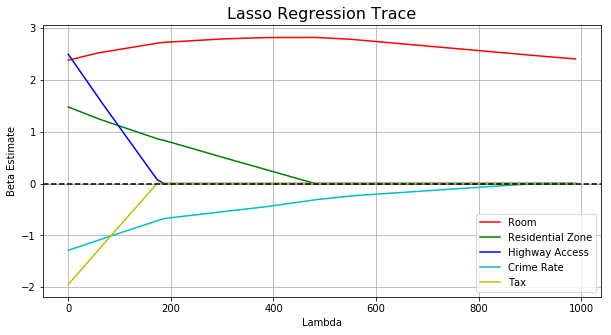

In [23]:
# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lasso_df.RM, 'r', lasso_df.ZN, 'g', lasso_df.RAD, 'b', lasso_df.CRIM, 'c', lasso_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)

‘Room’ should be the best indicator for house price by intuition. This is why the line in red does not quite shrink over iteration. On the contrary, ‘Highway Access’ (blue) decreases remarkably, which means the feature loses its importance as we seek more general models. If we increase the lambda more and more (extremely biased), then only ‘Room’ would stay significant, which makes sense again because the number of rooms must explain the most.

### A simple explanation of the Lasso and Least Angle Regression (from Rob Tibshirani)

Give a set of input measurements $x_1, x_2 ...x_p$ and an outcome measurement $y$, the lasso fits a linear model 

$\hat y = \beta_0 + \beta_1x_1+ \beta_2x_2 + ... \beta_px_p $

The criterion it uses is: 

Minimize $sum (y-\hat y)^2 $ subject to $sum|\beta_j| <= s $

The first sum is taken over observations (cases) in the dataset. The bound "s" is a tuning parameter. When "s" is large enough, the constraint has no effect and the solution is just the usual multiple linear least squares regression of $y$ on $x_1, x_2 ...x_p$. 

However when for smaller values of s (s>=0) the solutions are shrunken versions of the least squares estimates. Often, some of the coefficients bj are zero. Choosing "s" is like choosing the number of predictors to use in a regression model, and cross-validation is a good tool for estimating the best value for "s". 


### Computation of the Lasso solutions


The computation of the lasso solutions is a quadratic programming problem, and can be tackled by standard numerical analysis algorithms. But the least angle regression procedure is a better approach. This algorithm exploits the special structure of the lasso problem, and provides an efficient way to compute the solutions simulataneously for all values of "s". 

Least angle regression is like a more "democratic" version of forward stepwise regression. Recall how forward stepwise regression works: 


#### Forward stepwise regression algorithm:


- Start with all coefficients $\beta_j$ equal to zero.

- Find the predictor $x_j$ most correlated with $y$, and add it into the model. Take residuals $\varepsilon = y-\hat y$.

- Continue, at each stage adding to the model the predictor most correlated with $\varepsilon$.

- Until: all predictors are in the model

The least angle regression procedure follows the same general scheme, but doesn't add a predictor fully into the model. The coefficient of that predictor is increased only until that predictor is no longer the one most correlated with the residual $\varepsilon$. Then some other competing predictor is invited to "join the club". 


#### Least angle regression algorithm:


- Start with all coefficients $\beta_j$ equal to zero.

- Find the predictor $x_j$ most correlated with $y$

- Increase the coefficient $\beta_j$ in the direction of the sign of its correlation with $y$. Take residuals $\varepsilon = y-\hat y$ along the way. Stop when some other predictor $x_k$ has as much correlation with $\varepsilon$ as $x_j$ has.

- Increase ($\beta_j$, $\beta_k$) in their joint least squares direction, until some other predictor $x_m$ has as much correlation with the residual.

- Continue until: all predictors are in the model

Surprisingly it can be shown that, with one modification, this procedure gives the entire path of lasso solutions, as $s$ is varied from 0 to infinity. The modification needed is: if a non-zero coefficient hits zero, remove it from the active set of predictors and recompute the joint direction.

> LARS paper: http://www-stat.stanford.edu/%7Etibs/ftp/lars.pdf

> sklearn implementation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lars_path.html

### Example: LARS on Boston Housing Dataset

In [1]:
# dataframe and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# dataset
from sklearn.datasets import load_boston
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, LARS
from sklearn.linear_model import LinearRegression, lars_path
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# load dataset
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target

# standardize and train/test split
house_price.data = preprocessing.scale(house_price.data)
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Computes Lasso Path along the regularization parameter using the LARS algorithm on the Boston Housing dataset. Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter.

Computing regularization path using the LARS
.

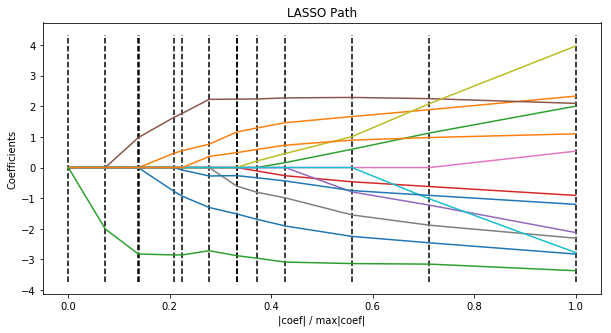

In [6]:
print("Computing regularization path using the LARS")
_, _, coefs = lars_path(X_train, y_train, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

The graph shows the non-zero coefficients being added to the active set, and increasing in numerical magnitude, as we move from left to right. Left of the diagram has $s$ close to zero, forcing $sum|\beta_j| $ to be near zero. As we move to the right, the constraint relaxes, and new non-zero coefficients are added to the active set.